In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
def readEvalInfo(filePath):
    return pd.read_csv(filePath)[~ pd.read_csv(filePath)['eval_loss'].isnull()].reset_index(drop=True)

In [3]:
evalInfo_clean = readEvalInfo('./trainingMetric/TI-bert-base-uncased-clean-v1.csv')
evalInfo_original = readEvalInfo('./trainingMetric/TI-bert-base-uncased-original-plutchik-v1.csv')

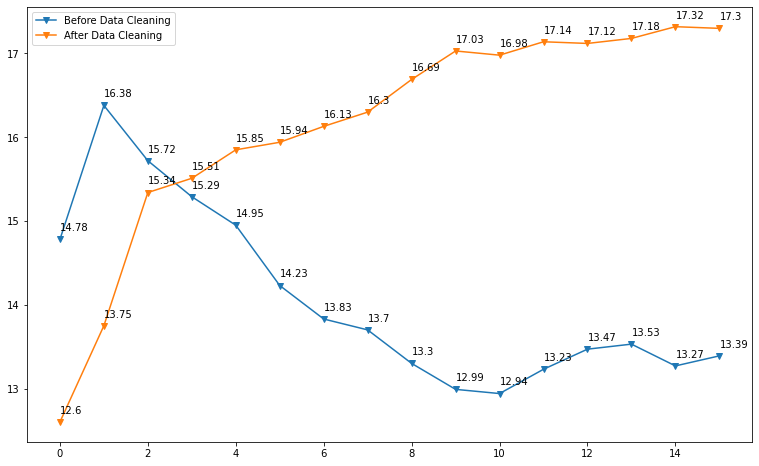

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13.0, 8.0) 
x = range(16)
y0 = [ round(x*100, 2) for x in evalInfo_original['eval_accuracy']]
y3 = [ round(x*100, 2) for x in evalInfo_clean['eval_accuracy']]

plt.plot(x, y0, label='Before Data Cleaning', marker='v')
for a,b in zip(x, y0): 
    plt.text(a, b+0.1, str(b))
    
plt.plot(x, y3, label= 'After Data Cleaning', marker='v')
for a,b in zip(x, y3): 
    plt.text(a, b+0.1, str(b))
    
plt.legend()
plt.show()

<Figure size 936x576 with 0 Axes>

In [22]:
evaluationSpecificInfo_sentenceRemoved = pd.read_csv("./trainingMetric/evaluationSpecificInfo-sentenceRemoved-v1.csv", index_col=0)
evaluationSpecificInfo_withDataCleaning = pd.read_csv("./trainingMetric/evaluationSpecificInfo-withDataCleaning-v1.csv", index_col=0)
evaluationSpecificInfo_keepPhaseEmo_withoutPlutchikVoting = pd.read_csv("./trainingMetric/evaluationSpecificInfo-keepPhaseEmo-withoutPlutchikVoting-v1.csv", index_col=0)
evaluationSpecificInfo_keepPhaseEmo = pd.read_csv("./trainingMetric/evaluationSpecificInfo-keepPhaseEmo-v1.csv", index_col=0)

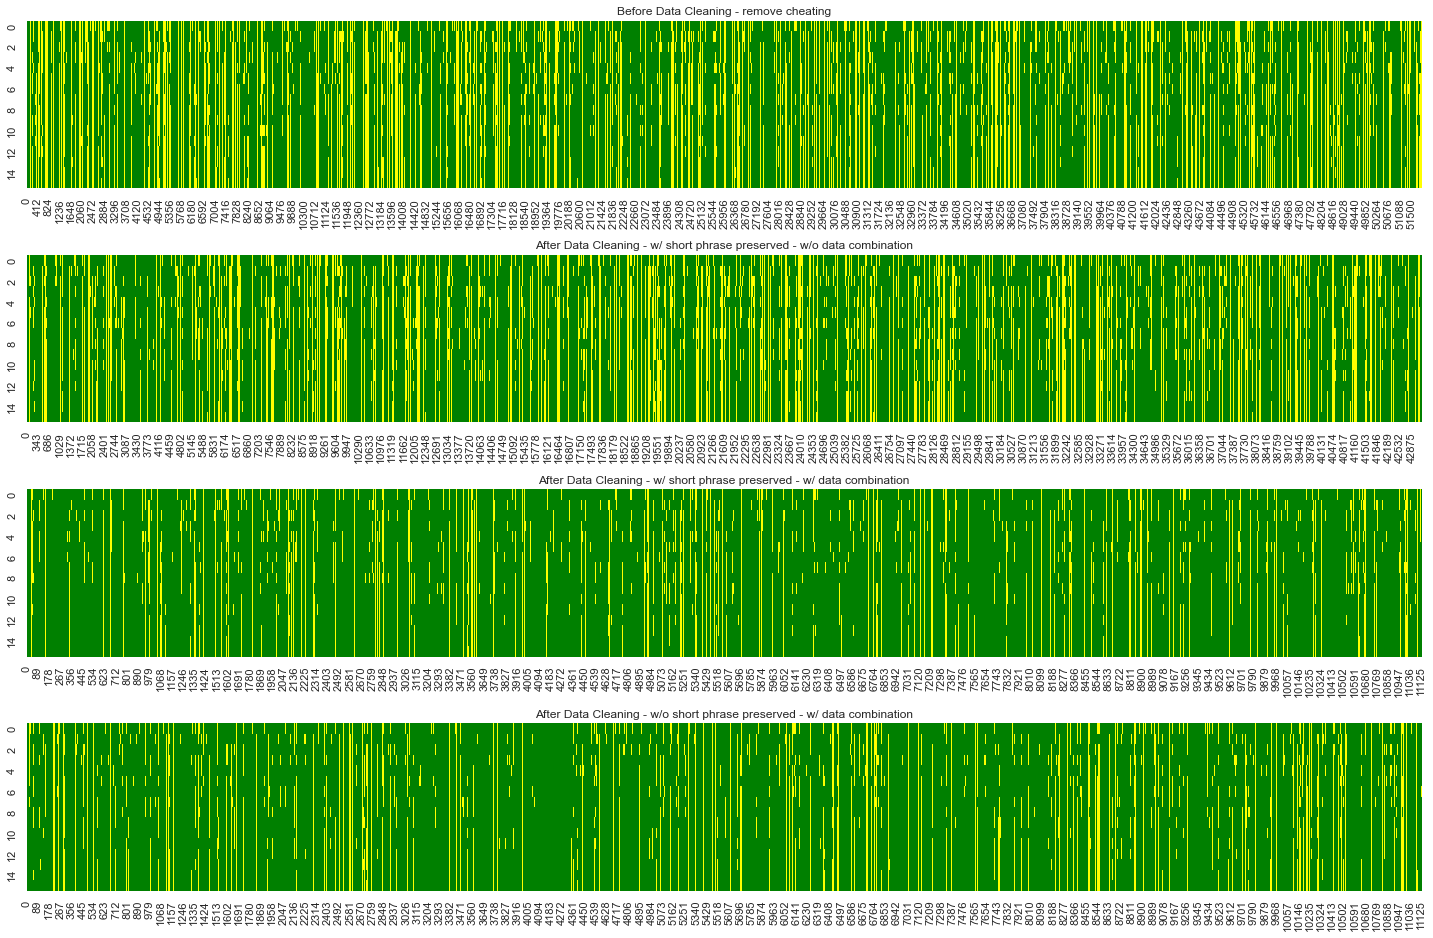

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
plt.subplots_adjust(hspace=0.4, wspace=0.2)
sns.set(rc = {'figure.figsize':(25,16)})

plt.subplot(4,1,1)
plt.title('Before Data Cleaning - remove cheating')
g = sns.heatmap(np.transpose(evaluationSpecificInfo_sentenceRemoved), 
            cbar = False, 
            cmap= LinearSegmentedColormap.from_list("", ["green", "yellow"]))

plt.subplot(4,1,2)
plt.title('After Data Cleaning - w/ short phrase preserved - w/o data combination')
g = sns.heatmap(np.transpose(evaluationSpecificInfo_keepPhaseEmo_withoutPlutchikVoting), 
            cbar = False, 
            cmap= LinearSegmentedColormap.from_list("", ["green", "yellow"]))

plt.subplot(4,1,3)
plt.title('After Data Cleaning - w/ short phrase preserved - w/ data combination')
g = sns.heatmap(np.transpose(evaluationSpecificInfo_keepPhaseEmo), 
            cbar = False, 
            cmap= LinearSegmentedColormap.from_list("", ["green", "yellow"]))

plt.subplot(4,1,4)
plt.title('After Data Cleaning - w/o short phrase preserved - w/ data combination')
g = sns.heatmap(np.transpose(evaluationSpecificInfo_withDataCleaning), 
            cbar = False, 
            cmap= LinearSegmentedColormap.from_list("", ["green", "yellow"]))

# check in different input

In [4]:
withPreContext_cur = readEvalInfo('./trainingMetric/curEmo/TI-bert-base-uncased-clean-v1-context+prevSent.csv')
onlySentence_cur = readEvalInfo('./trainingMetric/curEmo/TI-bert-base-uncased-clean-v1-prevSent.csv')
withPreContext_next = readEvalInfo('./trainingMetric/nextEmo/TI-bert-base-uncased-clean-v1-context+prevSent.csv')
onlySentence_next = readEvalInfo('./trainingMetric/nextEmo/TI-bert-base-uncased-clean-v1-prevSent.csv')

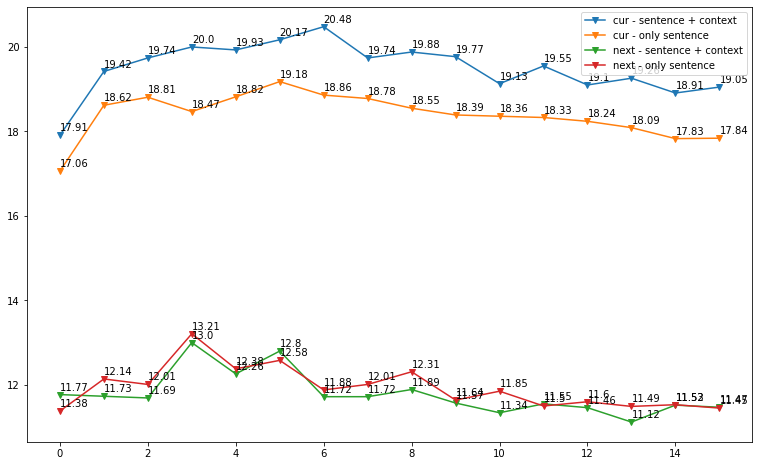

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13.0, 8.0) 
x = range(16)
y0 = [ round(x*100, 2) for x in withPreContext_cur['eval_accuracy']]
y1 = [ round(x*100, 2) for x in onlySentence_cur['eval_accuracy']]
y2 = [ round(x*100, 2) for x in withPreContext_next['eval_accuracy']]
y3 = [ round(x*100, 2) for x in onlySentence_next['eval_accuracy']]

plt.plot(x, y0, label='cur - sentence + context', marker='v')
for a,b in zip(x, y0): 
    plt.text(a, b+0.1, str(b))
    
plt.plot(x, y1, label= 'cur - only sentence', marker='v')
for a,b in zip(x, y1): 
    plt.text(a, b+0.1, str(b))
    
plt.plot(x, y2, label='next - sentence + context', marker='v')
for a,b in zip(x, y2): 
    plt.text(a, b+0.1, str(b))
    
plt.plot(x, y3, label= 'next - only sentence', marker='v')
for a,b in zip(x, y3): 
    plt.text(a, b+0.1, str(b))
    
plt.legend()
plt.show()